# Linear Regression in Practice

In this lab we will work through an extended example of exploratory data analysis and supervised machine learning using the California Housing Price Dataset. This dataset consists of data about housing characteristics and prices in many districts of the state of California. The **task** this dataset asks us to solve is estimating the median house value in a district from a set of independent housing characteristics.

**Note**: the exercises are inline in this notebook and *not* at the end. The exercises will ask you to write some code and sometimes to provide some analysis of your findings in Markdown cells at the end of the exercise.

## Part 1: Warming Up

In this first set of exercises we will analyze our dataset and build a simple linear regression pipeline. This is a fairly typical task that is asked of anyone working with Data Science: Here is some data, do something useful with it!

### Step 1: Data Modeling

OK, let's get started. The first thing we want to do is get our dataset loaded and start to get a feel for it. This is always a good idea -- we *play* with the data first in order to get a better understanding of it.

In [2]:
# Initial imports -- these are fairly standard.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Import the function that will download the dataset.
from sklearn.datasets import fetch_california_housing

# Load the sklearn version of the California Housing dataset.
ds = fetch_california_housing()

### Exercise 1a: Poking Around

Spend some time looking at the elements of the `ds` we just loaded (it's a python `dict`). Find the description of the dataset and make sure you understand what the features are and what the targets variable is. **Hints**: to get the keys of the dictionary, use: `ds.keys()`.

We are going to construct a Pandas `DataFrame` in the next exercise. Where can you get reasonable column names from the sklearn dataset object?

In [3]:
# Your code here.
print(ds.keys())
print(ds.DESCR)
print(ds.data.shape)
print(ds.target_names)

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])
.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
ex

**Your Analysis Here**: From running this code, we have obtained some information about the Data Set we are working with. We can see the number of _instances_ and _attributes_, how the data were collected and what is the target. In addition we have some information about the attributes, like their names and a short explanation of their meaning.

### Exercise 1b: Creating a Pandas DataFrame

OK, now we can create the `DataFrame` to hold our independent variables and a `Series` to hold the target values. Make sure you use good column names when constructing the `DataFrame`. Some relevant documentation: [pandas.DataFrame](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html) and [pandas.Series](https://pandas.pydata.org/docs/reference/api/pandas.Series.html).

In [4]:
# Create a Pandas DataFrame for our dataset and a Pandas Series for the targets.

# Your code to build the DataFrame here (replace None)
df = pd.DataFrame(data = ds.data, columns = ds.feature_names)

# Your code to build the target Series here (replace None)
targets = pd.Series(data = ds.target)

### Exercise 1c: Examining the Data

Study the *descriptive statistics* of the data. Do you notice anything "strange" about any of the features? Are the features scaled similarly? **Hint**: Use the `.describe()` method on the DataFrame you created.

In [5]:
# Your code here.
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


**Your Analysis Here**: We can see that the data are not scaled similarly and this could be a problem. For example if features are not scaled similarly is hard to compare data. To resolve this problem we could normalize and scale the features, so that the comparison of the data has a meaningful result.

---
### Step 2: Visualization

OK, now that we have a bit of a *feel* for our data, let's get a better idea about it through visualization.

### Exercise 2a: Visualizing the Target
Create a plot to study the **distribution** of our target values. The best tool for that is a **histogram**. Search for this functionality in the Matplotlib documentation.

**Note**: In addition to *histograms*, try out the Seaborn function `distplot`.

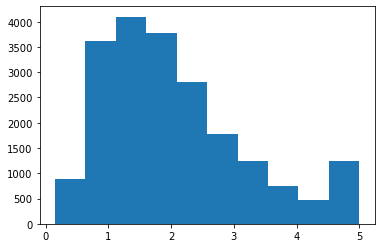

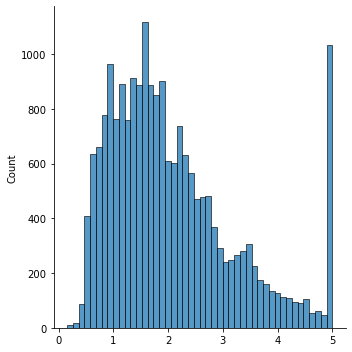

In [6]:
# Your visualization code here.
plt.hist(targets)

import seaborn
_ = seaborn.displot(targets)

**Your Analysis Here**: These 2 histograms represent the distribution of our target values. We can see that there are many houses that are worth between 100k and 200k, ore that are worth 500k. We have a lower number of houses that are worth between 300k and 450k.

### Exercise 2b: Subplots
Now create a multi-plot figure to visualize the distributions of **all** of the independent features in the dataset. Make sure you use `figsize=` to resize the figure appropriately.

A few things that will help with this:
+ If you want to index columns by **integer** indices, use the `.iloc()` method (e.g. `df.iloc[:,1]`).
+ If you extract a column as a `Series` from a `DataFrame`, you can recover its name with the `name` attribute.
+ Encapsulate you plotting code in a **function** you can call later.

**Super Hint**: Pandas already has this functionality **built-in**. If you can find it, use it!


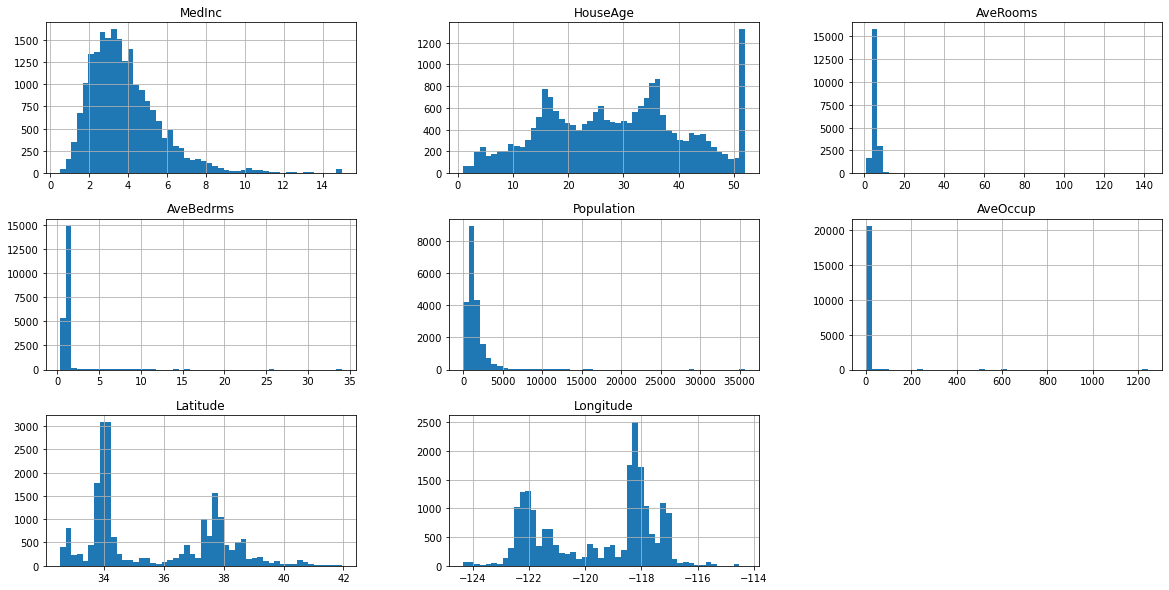

In [7]:
# Your code here.
_ = df.hist(bins = 50, layout = (3,3), figsize = (20,10))

---
## Step 3: Split you Data

A very important step. Now we will split our `DataFrame` into training and testing splits.

### Exercise 3.1: Create a Split
Now we need to create our training and testing splits. Read the documentation for `sklearn.model_selection.train_test_split()`. Use this function to create a **training** split with 75% of the data, and a **test** split with 25% of the data.

In [8]:
# Your code here.
from sklearn.model_selection import train_test_split

# Split data into 75-25 train/test split -- replace the [None]*4 with your code.
(Xtr, Xte, ytr, yte) = train_test_split(df, targets, test_size=0.25, train_size=0.75)

### Exercise 3.2: Fit a LinearRegression
Finally some machine learning. Study the documentation for `class sklearn.linear_model.LinearRegression`. Then write some code to fit a linear regression model to your **training** split. Try out your model by computing predictions on some data (use the `model.predict()` method).


In [9]:
from sklearn.linear_model import LinearRegression

# Your code here.
model = LinearRegression()
model.fit(Xtr, ytr)
pred_te = model.predict(Xte)
print(pred_te)

[3.39327552 1.06052751 3.03235711 ... 0.15744491 2.10725246 1.9878382 ]


### Exercise 3.3: Evaluate your Model
Write some code to compute the root mean-squared error (RMSE) and mean absolute error (MAS) for you model predictions. Try it on both the **test** and **training** splits.

In [10]:
# Your code here.
from sklearn.metrics import mean_squared_error, mean_absolute_error

pred_tr = model.predict(Xtr)
RMSE_Test = mean_squared_error(yte, pred_te)
RMSE_Training = mean_squared_error(ytr, pred_tr)
MAE_Test = mean_absolute_error(yte, pred_te)
MAE_Training = mean_absolute_error(ytr, pred_tr)
print(RMSE_Test, RMSE_Training)
print(MAE_Test, MAE_Training)

0.5406298259923535 0.5197787836431393
0.5364542942571106 0.5301924155352449


**Your Analysis Here**: The performance of the model depends on the training and test data and, of course, on how we split the dataset in training and testing. In this case we can see that we have a better performance on the training set rather than on the testing set, because the model is trained on those values, and so they are easier to predict. This could change if we re-run all the cells and we could ever have a better performance on the testing set. We can also see that the difference between the errors on the training and testing sets is very slim, so we could say that the performance is the same for training and testing sets.
If we change the proportion of training to test data in our splits, we can see that the errors don't change too much (see exercise 4)

### Exercise 3.4: Visualizing the Results
Now I want you to write a function that makes a **residual plot** of the data and the model predictions. This plot should show, for each data point, the **signed error** (i.e. y - predicted) of the model prediction. Do you notice any **patterns** in the errors? Can you link this to previous analyses you made? 

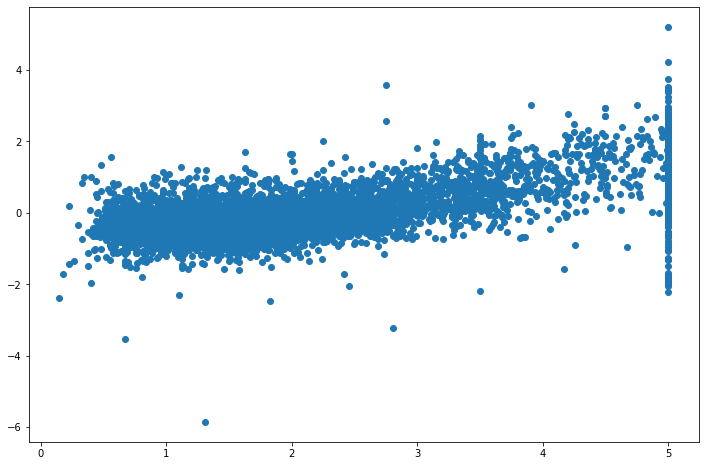

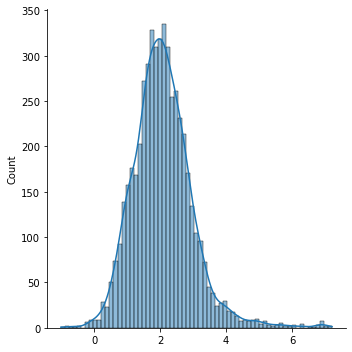

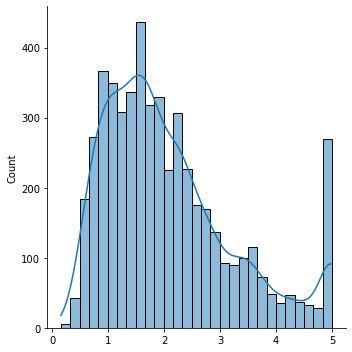

In [11]:
# Your code here.
import seaborn as sb

yte = np.array(yte)

indexes = np.argsort(yte)
ord_pred_te = pred_te[indexes]
ord_yte = yte[indexes]

signed_error = ord_yte - ord_pred_te

plt.figure(figsize=(12, 8))
_ = plt.scatter(ord_yte, signed_error)

_ = sb.displot(data = pred_te, kde = True)
_ = sb.displot(data = yte, kde = True)

**Your Analysis Here** The first plot shows, for each data point, the signed error of the model prediction. If we run this code several times, we can see that all the errors tend to grow as house values rise, but they are less dense. For values between 100k and 300k the errors are near 0, but in the plot we can see a more dense accumulation of points.
The first histogram represents the pretiction, while the second the test values. We can see that the model predicts very well values up until 300k, but the prediction of houses' value of 500k is not very good.

correct_degree(Xtr, Xte, ytr, yte, 7, 3)### Step 4: Repeat.

Now you should put all of the pieces together into a repeatable, reproducible pipeline.

### Exercise 4: The Pipeline
Write a function (or even just code in the cell that calls previously defined functions) that runs an **experiment**:
1. Splitting data
1. Instantiating the model
1. Fitting the model
1. Evaluating the model
1. (Maybe) Visualizing results

Experiment with different splits to see if the results are the same. Try using more or less training data with respect to test data. Observe how the results change.

RSME Test: 0.4844148809159665   RSME Training: 0.5288528848867907
MAE Test: 0.5137963674725055 MAE Training: 0.5335944209503325

RSME Test: 0.5164178771489171   RSME Training: 0.5264283027483729
MAE Test: 0.5254210397335781 MAE Training: 0.5333351526199608

RSME Test: 0.507241199185272   RSME Training: 0.5306792201933894
MAE Test: 0.5171752996015607 MAE Training: 0.537761478731989

RSME Test: 0.5216334145922599   RSME Training: 0.5288857721520805
MAE Test: 0.5296624994180251 MAE Training: 0.533593767880014

RSME Test: 0.5183477725951382   RSME Training: 0.5648698130596472
MAE Test: 0.5274190650394425 MAE Training: 0.5468203950503845

RSME Test: 0.5316342344531186   RSME Training: 0.48924515848972655
MAE Test: 0.5322471990778107 MAE Training: 0.5206669171897631



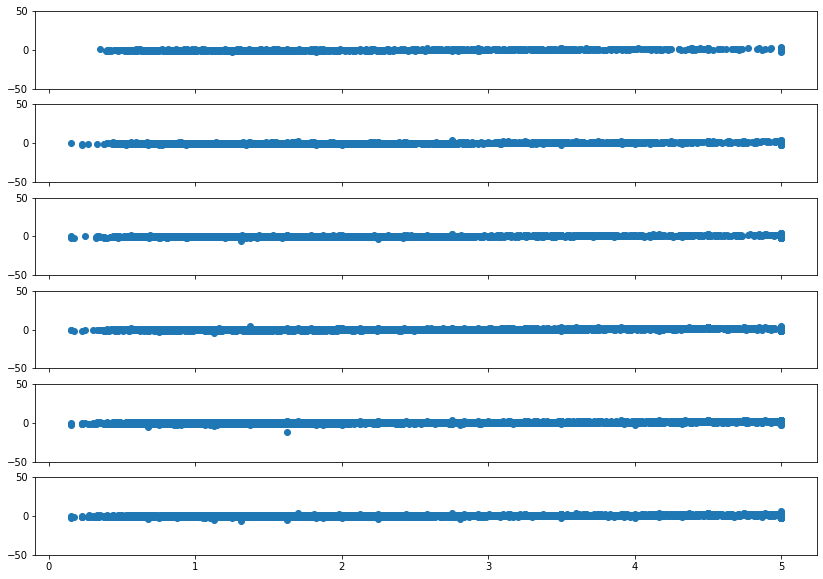

In [12]:
# Your pipeline code here.
def pipeline(model, df, targets, train_size=0.75, plot_axe = None, visualizing_results = True ):
    # Splitting data
    (Xtr, Xte, ytr, yte) = train_test_split(df, targets, test_size = 1 - train_size, train_size= train_size)
    
    # Instantiating the model
    model = LinearRegression()
    
    # Fitting the model
    model.fit(Xtr, ytr)
    
    # Evaluating the model
    pred_te = model.predict(Xte)
    pred_tr = model.predict(Xtr)
    RMSE_Test = mean_squared_error(yte, pred_te)
    RMSE_Training = mean_squared_error(ytr, pred_tr)
    MAE_Test = mean_absolute_error(yte, pred_te)
    MAE_Training = mean_absolute_error(ytr, pred_tr)
    print('RSME Test: ' + str(RMSE_Test), '  RSME Training: ' + str(RMSE_Training))
    print('MAE Test: ' + str(MAE_Test), 'MAE Training: ' + str(MAE_Training))
    print()
    
    if visualizing_results:
        # Visualizing results for one specific split of test and training
        yte = np.array(yte)
        indexes = np.argsort(yte)
        ord_pred_te = pred_te[indexes]
        ord_yte = yte[indexes]
        signed_error = ord_yte - ord_pred_te
        plot_axe.scatter(ord_yte, signed_error)

    
ig, ax = plt.subplots(6, sharey = True, sharex = True, figsize= (14,10))
plt.ylim([-50,50])

pipeline(model, df, targets, train_size=0.90, plot_axe=ax[0])
pipeline(model, df, targets, train_size=0.80, plot_axe=ax[1])
pipeline(model, df, targets, train_size=0.75, plot_axe=ax[2])
pipeline(model, df, targets, train_size=0.50, plot_axe=ax[3])
pipeline(model, df, targets, train_size=0.25, plot_axe=ax[4])
pipeline(model, df, targets, train_size=0.10, plot_axe=ax[5])

**Your Analysis Here**: We have experimented with different splits and we tried using more or less training data with respect to test data. From the errors generated by one split for each training size, we can't say much about the performance of our model. So let's plot the learning curve taking the average error on 10 different data splits.

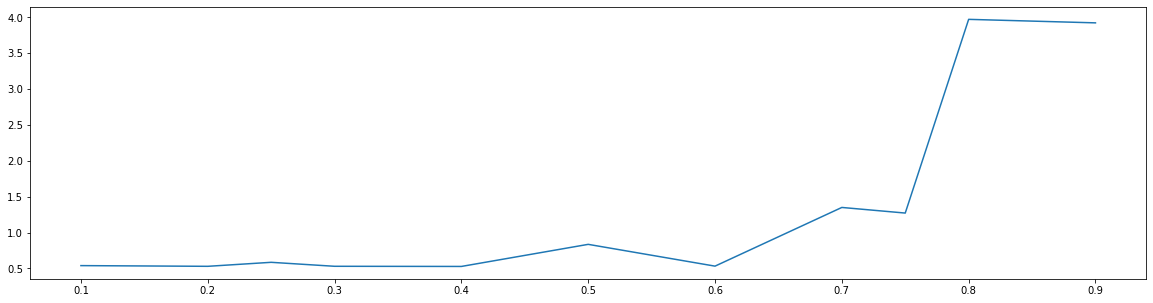

In [29]:
def pipeline_iter(df, targets, test_size):
    max_iter = 10
    RSME_te = []    
    RSME_tr = []
    
    for i in range(max_iter):
        # Splitting data
        (Xtr, Xte, ytr, yte) = train_test_split(df, targets, test_size = test_size, train_size = 1 - test_size)

        # Instantiating the model
        model = LinearRegression()

        # Fitting the model
        model.fit(Xtr, ytr)

        # Evaluating the model
        pred_te = model.predict(Xte)
        RSME_te.append(mean_squared_error(yte, pred_te))
        pred_tr = model.predict(Xtr)
        RSME_tr.append(mean_squared_error(ytr, pred_tr))
    avg_te = sum(RSME_te) / len(RSME_te)
    avg_tr = sum(RSME_tr) / len(RSME_tr)
    return avg_te, avg_tr


test_percent = [0.1, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.75, 0.8, 0.9]
RSME_te_av = []
for i in range(len(test_percent)):
    avg_te, avg_tr = pipeline_iter(df, targets, test_size = test_percent[i])
    RSME_te_av.append(avg_te)

plt.figure(figsize=(20,5))
_ = plt.plot(test_percent,RSME_te_av)

**Your Analysis Here**: We can see that if we increase the % of test data the error is higher, as we would expect.

---
---
## Part 2: Improving our Regressor

Now that we have a simple, baseline linear regression result, let's see if we can't improve on it. This is where the real work begins, and where it is **super** important to ensure that the conclusions we draw are *valid*.

**Questions**: Are our independent variables *scaled* similarly? Does our model have *high variance* -- that is, if we fit it to a new training sample, does the result vary dramatically?

### Exercise 5: Increasing Model Capacity

Check out the documentation for `sklearn.preprocessing.PolynomialFeatures`. Map the independent variables onto a **polynomial** basis of variable order. Fit your model using your pipeline from above and observe its behavior for different degree polynomial embeddings.

RSME Test: 0.7563480789811476   RSME Training: 0.4245752034565978
MAE Test: 0.4681618986978531 MAE Training: 0.4621211774753783

RSME Test: 932.3801039694474   RSME Training: 0.3491475116809111
MAE Test: 0.9018432277754242 MAE Training: 0.4222150734059434

RSME Test: 4241.4908730387415   RSME Training: 0.3431894303599413
MAE Test: 1.3468798878158823 MAE Training: 0.41762228967943155

RSME Test: 637.9393909080112   RSME Training: 0.3229923583606746
MAE Test: 0.8235162133235836 MAE Training: 0.4020508805901922



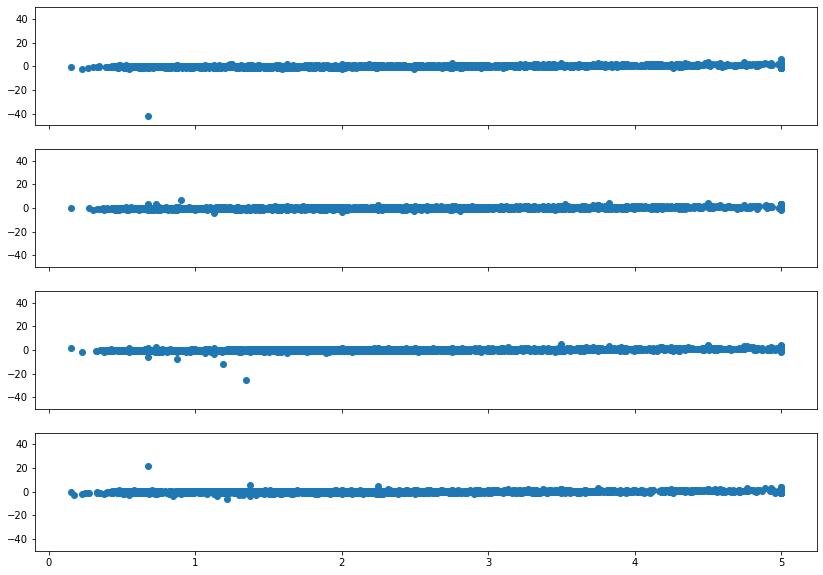

In [14]:
# Your code here.
from sklearn.preprocessing import PolynomialFeatures

df_poly1 = PolynomialFeatures(1).fit_transform(df)

df_poly2 = PolynomialFeatures(2).fit_transform(df)

df_poly3 = PolynomialFeatures(3).fit_transform(df)

df_poly4 = PolynomialFeatures(4).fit_transform(df)

ig, ax = plt.subplots(4, sharey = True, sharex = True, figsize= (14,10))
plt.ylim([-50,50])

pipeline(model, df_poly2, targets, train_size=0.75, plot_axe=ax[0])
pipeline(model, df_poly3, targets, train_size=0.75, plot_axe=ax[1])
pipeline(model, df_poly3, targets, train_size=0.75, plot_axe=ax[2])
pipeline(model, df_poly4, targets, train_size=0.75, plot_axe=ax[3])

### Exercise 6: Hyperparameter Selection and Cross-validation

How should we select the correct *degree* for our polynomial basis? Is the performance on the *training* set equal to the performance on the *test* set? Why?

[0.5871031250370189, 1.1821585241178076, 449574.5025750054, 420396018.4849227]
[0.5235228341939688, 0.42047952542729644, 0.34506353286979985, 0.33628813154395426]


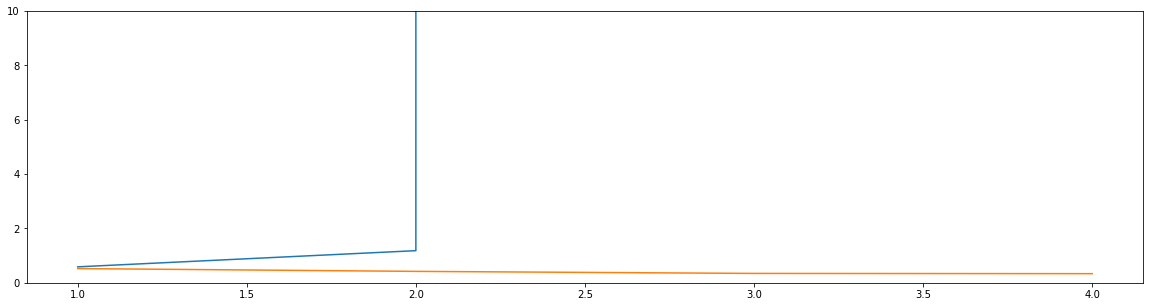

In [31]:
# Your code here.
from cProfile import label

#to select the correct degree we plot the validation curve and see when the model starts to overfit.

poly_deg = [1, 2, 3, 4]
RSME_te_av = []
RSME_tr_av = []
for deg in poly_deg:
    df_poly = PolynomialFeatures(deg).fit_transform(df)
    avg_te, avg_tr = pipeline_iter(df_poly, targets, test_size = 0.25)
    RSME_te_av.append(avg_te)
    RSME_tr_av.append(avg_tr)
    
print(RSME_te_av)
print(RSME_tr_av)
plt.figure(figsize=(20,5))
plt.ylim([0, 10])
_ = plt.plot(poly_deg, RSME_te_av)
_ = plt.plot(poly_deg, RSME_tr_av)

**Your Final Analysis Here**: Let's summarize what we have done so far:
1. In the 1st part of this notebook we obtained some information about the dataset we are working with, such as the number of attributes, some information about their meaning and what the target is.
1. In the 2nd part we have visualized the target and all the all of the independent features in the dataset, and we learned how the data are distributed.
1. In the 3rd part learned how to split the dataset in training and test, to fit a linear regression model to our training split, to evaluate the model and visualize the results.
1. In the 4th part we used what we learned in part 3 and we created a pipeline to understand how the model changes if we change the % of training and test splits. We used the pipeline to see some results, but for just one split for each training size. To be able to produce some meaningful results we have created another pipeline to plot the learning curve, which shows that the error is proportional to the % of the testing split.
1. In the 5th part  we mapped the independent variables onto a polynomial basis of variable order. Then we fitted our model using our pipeline from part 3 and observed its behavior for different degree polynomial embeddings. We plotted results just for one split of training and test size, but we can clearly see that for degree 3 and 4 the RSME on the test split is very big.
1. In the 6th part we used the 2nd pipeline to print the validation curve to see where the model starts overfitting the test data. The degree where the RSME is the lowest is the best polynomial embedding of our model. If we observe the plot we can see that the best error is produced by degree 1 and after degree 2 the error explodes, which means that the model is starting to overfit.